# Flujo de trafico en las calles más transitadas de CDMX
## Aplicación de un sistema de ecuaciones lineales para modelar el trafico con enfoque en la tercera calle con más trafico en CDMX en los ultimos años: calle Rio Missipi
En el año 2023, la Ciudad de Mexico fue rankeada como la 13va ciudad con más trafico automovilistico en todo el mundo. El tiempo promedio para recorrer tan solo 10km en 2023 en CDMX fue de 26min y 30s.

### Contexto
Un habitante de la zona centro de CDMX, que se transporta en horas pico, gasta en promedio 263hrs al año en su automovil, de las cuales 152h fueron por congestión automovilistica. Al año, un solo ciudadano emite 983kg de 
CO con solo manejar, 
297kdebido a la congestión automovilistica. Un ciudadano tendria que plantar 98 arboles para absorber esta cantidad de CO2 que emite por manejar en la ciudad.o
Estos alarmantes datos motivan estudiar el flujo de trafico con un modelo matematico.



Analizaremos el trafico en la hora y dia con más trafico de la semana: los jueves de 7pm a 8pm, pues recorrer 10km tarda almenos 40min. Sean las calles a estudiar: Rio Missipi, Rio Panuco, Rio Ganges y Rio Lerma; estas 4 calles interseccionan entre si. Hago un diagrama de estas cuatro calles, con la dirección del trafico en cada linea y hago puntos de intersección para referencia. 


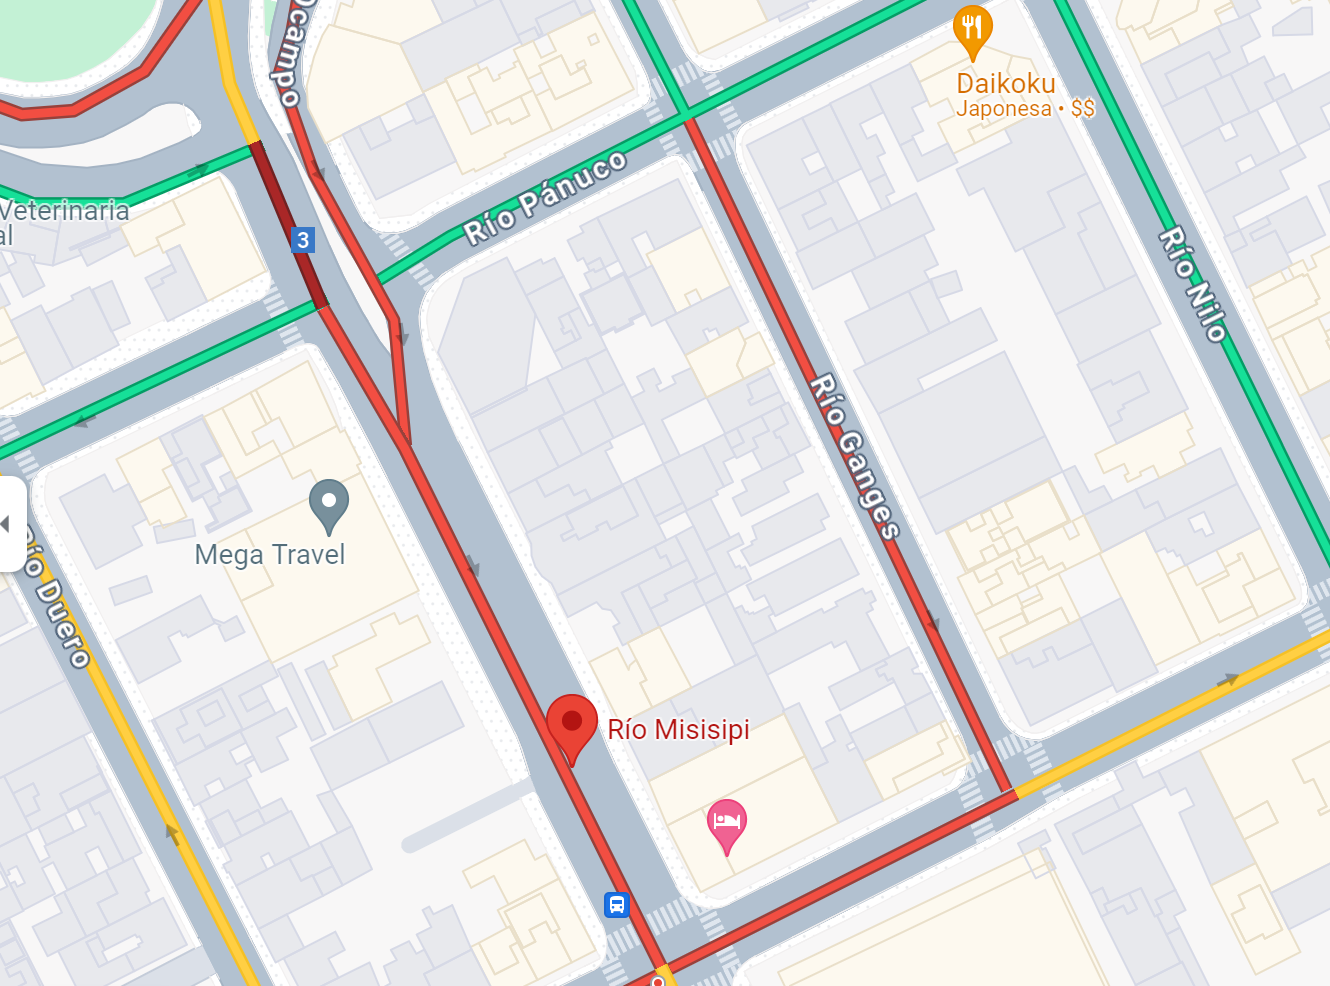

Sea A: la intersección entre calle Rio Panuco y calle Rio Ganges, B: la intersección entre calle Rio Ganges y calle Rio Lerma, C: la intersección entre calle Rio Misisipi y Rio Lerma y por ultimo D: la intersección entre las calles Rio Misisipi y Rio Panuco.

Asi mismo creamos variables para el trafico entrante y saliente de estas intersecciones. 
Sean nuestras variables $x$: trafico entre intersección B y A, $y$: trafico entre intersección D y A, $z$: trafico entre la intersección D y C y $w$: trafico entre la intersección C y B. 
Esto se puede visualizar en el siguiente diagrama:


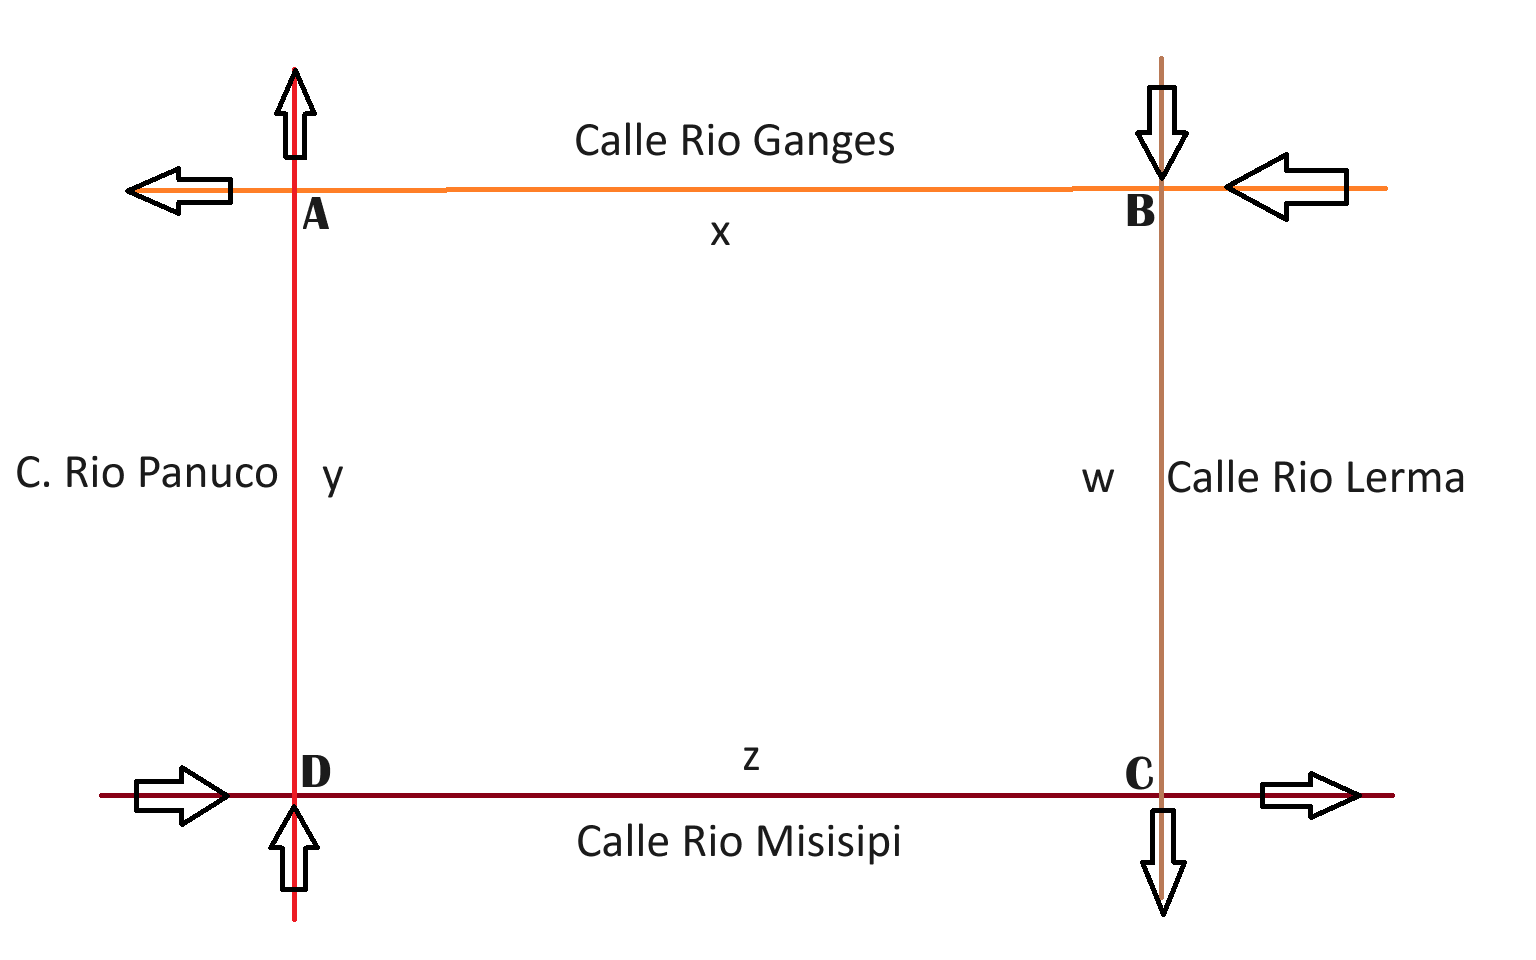


Pensemos que idealmente el trafico que entra a cada intersección es exactamente el mismo que sale de la intersección. En tal caso podemos formar ecuaciones con saber el trafico saliente o entrante usando las variables ya definidas.

Para este caso hipotetico, yo Esmeralda fui a CDMX y me pare a contar el numero de vehiculos atravesando estas calles, en hora pico un jueves de 7pm-8pm. Pude recolectar el numero de vehiculos entrando y saliendo de cada calle, lo que busco obtener y me da información del trafico es cuantos automoviles se quedaron estancados en cada calle durante esa hora, eso es lo que busco encontrar con el sistema de ecuaciones que armare.
Estos son los datos hipoteticos recolectados:

De la intersección A salieron en dirección a calle Rio Panuco  190 vehiculos por hora, en dirección a calle Rio Ganges salieron 241 vehiculos por hora (vph). A la intersección B entraron en dirección Calle Rio Lerma 150 vph, en dirección Rio Ganges 105 vph. De la intersección C salieron 110 vph dirigidos a calle Rio Lerma y otros 230 vph siguieron su camino por rio Misisipi. A la intersección D pasaron 280 vph dirigidos a Rio Misisipi y otros 236 vph en dirección a Rio Panuco. 

Escribo entonces mis ecuaciones para cada intersección en terminos de mis variables.

En A: $x+y=241+190=431$

En B: $150+105=255=x+w$

En C: $z+w=230+110=340$

En D: $280+236=516=y+z$

Tengo un sistema de 4 ecuaciones lineales con 4 incognitas a resolver:

$x+w=255$

$x+y=431$

$z+w=340$

$y+z=516$

### Planteamiento
Para un sistema lineal de ecuaciones descritas por la matriz de coeficientes A, vector de variables X y las salidas en vector F este se describe por el producto de matrices AX=F. En este caso tengo:

A = $\begin{equation}
\begin{pmatrix}
1 & 0 & 0 & 1\\
1 & 1 & 0 &0\\
0 & 0 & 1 & 1\\
0 & 1 & 1 & 0\\
\end{pmatrix}
\end{equation}$ , X = $\begin{equation}
\begin{pmatrix}
x & y & z & w\\
\end{pmatrix}
\end{equation}$ y F = $\begin{equation}
\begin{pmatrix}
255 & 431 & 340 & 516\\
\end{pmatrix}
\end{equation}$

Reduciendo la matriz por reducción de renglones hasta obtener una matriz triangular superior U y entonces AX=F se convierte en UX=G, resolver para X ya es más sencillo. Con la obtención de la matriz triangular superior ya obtengo una reducción de mis variables principales $x$, $y$ y $z$ en terminos de la variable restante $w$, si quiero un valor numerico como resultado bastara con darle valor a $w$.

In [18]:
#para trabajar con vectores y matrices es el numpy
#para trabajar con valores simbolicos es el sympy
import numpy as np
import sympy as sy

x,y,z,w= sy.symbols('x,y,z,w')

X= np.array([x,y,z,w])
#Inserta los coeficientes de cada ecuacion: los n elementos de la matriz A por fila
A= np.array([[1,0,0,1],[1,1,0,0],[0,0,1,1],[0,1,1,0]])
#insertar las igualdades de cada ecuacion: los n elementos del vector F
F= np.array([255,431,340,516])

def triang(A,F):
    #copiamos A y F para no usar originales
    U = np.copy(A)
    G = np.copy(F)
    #saca el tamaño del vector F y se lo asigna a n, n es el numero de elementos por fila y columna
    n = F.size
    
    for j in range(n-1):
        for i in range(j+1,n):
            M =U[i,j]/U[j,j]
            #j: hace que j recorra toda la fila
            U[i,j:] = U[i,j:] - (M*U[j,j:])
            G[i]= G[i] - (M*G[j])
    return U,G

#la funcion triang devuelve dos valores, 0 es U y 1 es G por eso se escribe [0] y [1] para acceder al return 0 y return 1            
U=triang(A,F)[0]
print(U)
G=triang(A,F)[1]
print(G)

#imprimo U y G como ecuaciones de x,y,z,w

[[ 1  0  0  1]
 [ 0  1  0 -1]
 [ 0  0  1  1]
 [ 0  0  0  0]]
[255 176 340   0]


In [ ]:
import numpy as np
import sympy as sy

x, y, z, w = sy.symbols('x y z w')

X = np.array([x, y, z, w])
A = np.array([[1, 0, 0, 1], [1, 1, 0, 0], [0, 0, 1, 1], [0, 1, 1, 0]])
F = np.array([255, 431, 340, 516])

def triang(A, F):
    U = np.copy(A)
    G = np.copy(F)
    n = F.size

    for j in range(n-1):
        for i in range(j+1, n):
            M = U[i,j] / U[j,j]
            U[i,j:] = U[i,j:] - (M * U[j,j:])
            G[i] = G[i] - (M * G[j])
    return U, G

U, G = triang(A, F)

# Resolviendo el sistema de ecuaciones lineales
X_solution = np.linalg.solve(U, G)

# Imprimiendo las soluciones X en forma de ecuaciones
for i, symbol in enumerate([x, y, z, w]):
    print(f"{symbol} =", X_solution[i])


Bibliografia:

Flores Godoy, Algebra Lineal, 2019.

L. Olivares-Quiroz and J. Pereda, Análisis estocástico del flujo vehicular para la red de ejes viales principales de la Ciudad de México mediante cadenas de Markov discretas, SMCCA (2021). 4 URL https://www.scipedia.com/public/Olivares-Quiroz_Pereda_2021a

TomTom International, 2024, https://www.tomtom.com/traffic-index/mexico-city-traffic/


In [39]:
import sympy as sp

def gaussian_elimination(A, b):
    n = len(b)
    for i in range(n):
        if i == 1:
            continue  # Mantener la segunda fila intacta
        # Pivoteo parcial: intercambiar filas si es necesario para evitar divisiones por cero
        max_row_index = i
        for j in range(i + 1, n):
            if abs(A[j][i]) > abs(A[max_row_index][i]):
                max_row_index = j
        A[i], A[max_row_index] = A[max_row_index], A[i]
        b[i], b[max_row_index] = b[max_row_index], b[i]
        
        # Verificar si la fila se convierte en una fila de ceros
        if all(element == 0 for element in A[i][i+1:]):
            break
        
        # Eliminación hacia adelante
        for j in range(i + 1, n):
            if A[i][i] == 0:
                continue  # Evitar la división por cero
            factor = A[j][i] / A[i][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]
    
    # Sustitución hacia atrás
    x = [0] * n
    for i in range(n - 1, -1, -1):
        if A[i][i] == 0:
            continue  # Evitar la división por cero
        x[i] = b[i] / A[i][i]
        for j in range(i + 1, n):
            b[j] -= A[j][i] * x[i]
    
    return x

# Coeficientes de las ecuaciones
A = [[1, 1, 0, 0],
     [1, 0, 0, 1],
     [0, 0, 1, 1],
     [0, 1, 1, 0]]

# Términos independientes
b = [431, 255, 340, 516]

# Resolver el sistema de ecuaciones
solution = gaussian_elimination(A, b)

# Variables simbólicas
x, y, z, w = sp.symbols('x y z w')

# Imprimir el sistema reducido
print("Sistema reducido:")
for i in range(len(solution)):
    if all(element == 0 for element in A[i]):
        break
    print(f"{solution[i]} = {sp.solve(A[i][0]*x + A[i][1]*y + A[i][2]*z + A[i][3]*w - b[i], x, y, z, w)}")


Sistema reducido:
431.0 = [(431 - y, y, z, w)]
176.0 = [(x, w + 176.0, z, w)]
340.0 = [(x, y, 340.0 - w, w)]
-176.0 = [(x, w, z, w)]
